In [8]:
import cantera as ct
import matplotlib.pyplot as plt
import numpy as np
from cycler import cycler


In [9]:
%config InlineBackend.figure_formats = ['svg']

In [10]:
file = '/home/vasily/Projects/empirica_traveling_flame/chemistry/mechanisms/deepflame_ethanol_gri_reduced/ethanol66.yaml'



In [162]:
sol = ct.Solution(file)


Y_air_N2= 0.767
Y_air_O2= 0.233
Y_fuel = 0.00

# for j, phi in enumerate(phi_list):
# print("NNNNNNNNNNNNNNNNNNN  ", j)
# gas.set_equivalence_ratio(0, 'C2H5OH', {'O2':1, 'N2': 3.76})
    # gas.set_equivalence_ratio(phi, 'c2h5oh', {'o2':1, 'n2': 3.76})
sol.TPY = 293, 1e5, {"N2" : Y_air_N2 * (1-Y_fuel), "O2" : Y_air_O2 * (1-Y_fuel), "C2H5OH" : Y_fuel} 
# gas.TPY = 300, 1e5, {"N2" : 0.651, "O2" : 0.279, "C2H5OH" : 0.05} 

/tmp/ipykernel_31627/534708008.py:1: UserWarning: NasaPoly2::validate: 
For species CH2CH2OH, discontinuity in cp/R detected at Tmid = 1000
	Value computed using low-temperature polynomial:  15.107838949
	Value computed using high-temperature polynomial: 15.385775331099998

  sol = ct.Solution(file)
/tmp/ipykernel_31627/534708008.py:1: UserWarning: NasaPoly2::validate: 
For species CH2CH2OH, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  4.688575616966668
	Value computed using high-temperature polynomial: 4.64839243407

  sol = ct.Solution(file)
/tmp/ipykernel_31627/534708008.py:1: UserWarning: NasaPoly2::validate: 
For species CH3CHOH, discontinuity in cp/R detected at Tmid = 1000
	Value computed using low-temperature polynomial:  14.825843632999998
	Value computed using high-temperature polynomial: 15.109926177800002

  sol = ct.Solution(file)
/tmp/ipykernel_31627/534708008.py:1: UserWarning: NasaPoly2::validate: 
For species CH3CHOH,

In [127]:
{"N2" : Y_air_N2 * (1-Y_fuel), "O2" : Y_air_O2 * (1-Y_fuel), "C2H5OH" : Y_fuel} 

{'N2': 0.72865, 'O2': 0.22135, 'C2H5OH': 0.05}

In [117]:
den_init = sol.density
Enthalpy_initial = sol.enthalpy_mass
sol.equilibrate('TP')
den_fin = sol.density
Enthalpy_final = sol.enthalpy_mass
# print Y_f_initial


In [118]:
den_init

1.2068443003217961

In [119]:
den_fin

1.1695258089838347

In [120]:
(Enthalpy_initial - Enthalpy_final) / 1e6 * 1.2 

1.6634130023983482

In [122]:
sol()


  gas:

       temperature   293 K
          pressure   1e+05 Pa
           density   1.1695 kg/m^3
  mean mol. weight   28.491 kg/kmol
   phase of matter   gas

                          1 kg             1 kmol     
                     ---------------   ---------------
          enthalpy       -1.6469e+06       -4.6923e+07  J
   internal energy       -1.7324e+06       -4.9359e+07  J
           entropy              7045        2.0072e+05  J/K
    Gibbs function       -3.7111e+06       -1.0573e+08  J
 heat capacity c_p            1052.7             29992  J/K
 heat capacity c_v            760.86             21678  J/K

                      mass frac. Y      mole frac. X     chem. pot. / RT
                     ---------------   ---------------   ---------------
                N2           0.72865           0.74106           -23.346
                O2           0.11716           0.10432           -26.948
               H2O          0.058657          0.092767           -124.37
       

In [123]:
sol.equilibrate("HP")
sol()


  gas:

       temperature   293 K
          pressure   1e+05 Pa
           density   1.1695 kg/m^3
  mean mol. weight   28.491 kg/kmol
   phase of matter   gas

                          1 kg             1 kmol     
                     ---------------   ---------------
          enthalpy       -1.6469e+06       -4.6923e+07  J
   internal energy       -1.7324e+06       -4.9359e+07  J
           entropy              7045        2.0072e+05  J/K
    Gibbs function       -3.7111e+06       -1.0573e+08  J
 heat capacity c_p            1052.7             29992  J/K
 heat capacity c_v            760.86             21678  J/K

                      mass frac. Y      mole frac. X     chem. pot. / RT
                     ---------------   ---------------   ---------------
                N2           0.72865           0.74106           -23.346
                O2           0.11716           0.10432           -26.948
               H2O          0.058657          0.092767           -124.37
       

/tmp/ipykernel_31627/2808766058.py:1: UserWarning: ChemEquil::equilibrate: Temperature (293.0000000095768 K) outside valid range of 300 K to 5000 K
  sol.equilibrate("HP")


In [28]:
sol.thermal_conductivity

0.1002703933643746

In [124]:
sol.TP = 700, sol.P

In [125]:
sol()


  gas:

       temperature   700 K
          pressure   1e+05 Pa
           density   0.48953 kg/m^3
  mean mol. weight   28.491 kg/kmol
   phase of matter   gas

                          1 kg             1 kmol     
                     ---------------   ---------------
          enthalpy       -1.2004e+06         -3.42e+07  J
   internal energy       -1.4046e+06        -4.002e+07  J
           entropy            7994.7        2.2778e+05  J/K
    Gibbs function       -6.7967e+06       -1.9365e+08  J
 heat capacity c_p            1148.7             32728  J/K
 heat capacity c_v            856.86             24413  J/K

                      mass frac. Y      mole frac. X     chem. pot. / RT
                     ---------------   ---------------   ---------------
                N2           0.72865           0.74106           -24.334
                O2           0.11716           0.10432           -27.965
               H2O          0.058657          0.092767            -67.81
      

In [69]:
# sol.equilibrate("HP")

In [70]:
np.array(sol.species_names)[sol.Y > 0.005]

array(['N2', 'O2'], dtype='<U8')

In [71]:
sol.Y[sol.Y > 0.005]

array([0.767, 0.233])

In [72]:
alpha = sol.thermal_conductivity/sol.density/sol.cp_mass

In [73]:
alpha

9.702215991735118e-05

In [74]:
0.01**2 /sol.mix_diff_coeffs[sol.species_index("C2H5OH")]

np.float64(1.7978792855049424)

In [75]:
sol.mix_diff_coeffs[sol.species_index("C2H5OH")]

np.float64(5.562108691402747e-05)

In [76]:
sol.mix_diff_coeffs_mass[sol.species_index("C2H5OH")]

np.float64(5.562108691402747e-05)

In [77]:
sol.mix_diff_coeffs_mass[sol.species_index("O2")]

np.float64(9.082899340317784e-05)

In [61]:
0.01**2 / sol.mix_diff_coeffs[sol.species_index("O2")]

np.float64(1.1218126975797647)

In [115]:
# plt.style.use('ggplot')

# file = 'mechanisms/marinov_ethanol/from_repo/ethanol-marinov.yaml'
# file = 'mechanisms/deepflame_ethnaol_gri_reduced/ethanol66.yaml'



# models = {'Original': 'baseline', 'LMR-R': 'linear-Burke'}
# colours = ["xkcd:grey",'xkcd:purple']
# Tin = 293  # unburned gas temperature [K]
# p=760  # pressure [torr]
# n=10 # number of points to simulate
# phi_list = np.linspace(0.5,1.5,n) # equivalence ratios to simulate across
# # for k, m in enumerate(models):
# vel_list = []
# P_e = []
gas = ct.Solution(file)

Y_air_N2= 0.767
Y_air_O2= 0.233
Y_fuel = 0.08

# for j, phi in enumerate(phi_list):
# print("NNNNNNNNNNNNNNNNNNN  ", j)
# gas.set_equivalence_ratio(0, 'C2H5OH', {'O2':1, 'N2': 3.76})
    # gas.set_equivalence_ratio(phi, 'c2h5oh', {'o2':1, 'n2': 3.76})
# sol.TPY = 293 + 1000, 1e5, {"N2" : Y_air_N2 * (1-Y_fuel), "O2" : Y_air_O2 * (1-Y_fuel), "C2H5OH" : Y_fuel} 

# for j, phi in enumerate(phi_list):
# print("NNNNNNNNNNNNNNNNNNN  ", j)
# gas.set_equivalence_ratio(phi, 'C2H5OH', {'O2':1, 'N2': 3.76})


gas.TPY = 293, 1e5, {"N2" : Y_air_N2 * (1-Y_fuel), "O2" : Y_air_O2 * (1-Y_fuel), "C2H5OH" : Y_fuel} 

gas()
# gas.set_equivalence_ratio(phi, 'c2h5oh', {'o2':1, 'n2': 3.76})
# gas.TP = Tin, (p/760)*ct.one_atm
# print(gas())
# P_e.append(gas.concentrations[gas.species_index("c2h5oh")]*1000*8.31*gas.T/1e5)
f = ct.FreeFlame(gas, grid=np.linspace(0, 0.05, 30))
f.set_refine_criteria(ratio=3, slope=0.06, curve=0.10)
# f.transport_model = 'multicomponent' # optionally enable
# f.soret_enabled = True  # optionally enable
f.solve(loglevel=1, auto=True)
    # vel_list.append(f.velocity[0] * 100) # cm/s
    # f.save(file.split("/")[-1] + f".{j}.res.hdf")


/tmp/ipykernel_31627/769346861.py:17: UserWarning: NasaPoly2::validate: 
For species CH2CH2OH, discontinuity in cp/R detected at Tmid = 1000
	Value computed using low-temperature polynomial:  15.107838949
	Value computed using high-temperature polynomial: 15.385775331099998

  gas = ct.Solution(file)
/tmp/ipykernel_31627/769346861.py:17: UserWarning: NasaPoly2::validate: 
For species CH2CH2OH, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  4.688575616966668
	Value computed using high-temperature polynomial: 4.64839243407

  gas = ct.Solution(file)
/tmp/ipykernel_31627/769346861.py:17: UserWarning: NasaPoly2::validate: 
For species CH3CHOH, discontinuity in cp/R detected at Tmid = 1000
	Value computed using low-temperature polynomial:  14.825843632999998
	Value computed using high-temperature polynomial: 15.109926177800002

  gas = ct.Solution(file)
/tmp/ipykernel_31627/769346861.py:17: UserWarning: NasaPoly2::validate: 
For species CH3C


  gas:

       temperature   293 K
          pressure   1e+05 Pa
           density   1.2208 kg/m^3
  mean mol. weight   29.74 kg/kmol
   phase of matter   gas

                          1 kg             1 kmol     
                     ---------------   ---------------
          enthalpy       -4.1412e+05       -1.2316e+07  J
   internal energy       -4.9603e+05       -1.4752e+07  J
           entropy              6867        2.0423e+05  J/K
    Gibbs function       -2.4261e+06       -7.2154e+07  J
 heat capacity c_p            1040.7             30951  J/K
 heat capacity c_v            761.13             22636  J/K

                      mass frac. Y      mole frac. X     chem. pot. / RT
                     ---------------   ---------------   ---------------
                N2           0.70564           0.74912           -23.336
                O2           0.21436           0.19923           -26.301
            C2H5OH              0.08          0.051645           -133.55
     [  

In [7]:
file = '/home/vasily/Projects/empirica_traveling_flame/chemistry/mechanisms/deepflame_ethanol_gri_reduced/ethanol66.yaml'
gas = ct.Solution(file)


/tmp/ipykernel_28215/3051162265.py:2: UserWarning: NasaPoly2::validate: 
For species CH2CH2OH, discontinuity in cp/R detected at Tmid = 1000
	Value computed using low-temperature polynomial:  15.107838949
	Value computed using high-temperature polynomial: 15.385775331099998

  gas = ct.Solution(file)
/tmp/ipykernel_28215/3051162265.py:2: UserWarning: NasaPoly2::validate: 
For species CH2CH2OH, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  4.688575616966668
	Value computed using high-temperature polynomial: 4.64839243407

  gas = ct.Solution(file)
/tmp/ipykernel_28215/3051162265.py:2: UserWarning: NasaPoly2::validate: 
For species CH3CHOH, discontinuity in cp/R detected at Tmid = 1000
	Value computed using low-temperature polynomial:  14.825843632999998
	Value computed using high-temperature polynomial: 15.109926177800002

  gas = ct.Solution(file)
/tmp/ipykernel_28215/3051162265.py:2: UserWarning: NasaPoly2::validate: 
For species CH3C

In [8]:
gas.TPY = 300, 1e5, {"H2O":0.07, }

/tmp/ipykernel_1641619/4034545094.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(frameon=False, loc='upper right')


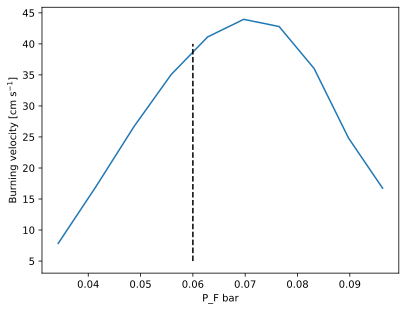

In [48]:

fig, ax = plt.subplots()
ax.plot(P_e, vel_list)
# ax.set_xticklabels([f"{phi:.1f} {p/(10**5):.3f}" for p, phi in zip(P_e, phi_list)])
# expData = {
#    'X_NH3': [16.3,16.4,17.0,18.0,19.0,20.0,21.9,24.0,26.0,28.5,29.0,30.0,31.0,31.5],
#    'vel': [1.35,1.48,2.30,3.36,4.01,5.88,6.80,8.14,6.73,5.00,4.78,3.3,2.9,3.0]
# }
# X_NH3 = np.divide(expData['X_NH3'],100)
# X_O2 = np.multiply(np.subtract(1,X_NH3), 0.21)
# phi_data = np.divide(np.divide(X_NH3,X_O2),np.divide(4,3))
# ax.plot(phi_data, expData['vel'], 'o', fillstyle='none', color='k', label='Ronney')
ax.legend(frameon=False, loc='upper right')
ax.set_ylabel(r'Burning velocity [cm $\rm s^{-1}$]')
ax.set_xlabel(r'P_F bar')
ax.plot([0.06, 0.06], [5, 40], '--', color='k')

In [21]:
# f.save(file.split("/")[-1] + ".res.hdf")

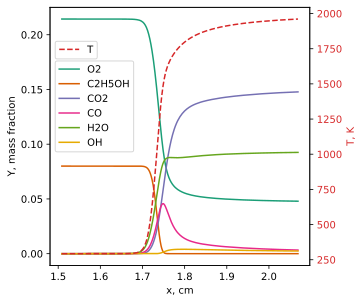

In [79]:
plt.style.use('default')

mask = (f.grid > 0.015) & (f.grid < 0.021)

# fig, ax = plt.subplots()
fig, ax2 = plt.subplots(figsize=(7/1.5, 7/1.5))

# fig.set_dpi(1000)

color = 'tab:red'
ax2.set_xlabel('x, cm')
spns = ["O2", "C2H5OH",  "CO2", "CO", "H2O", "OH"]
ax1 = ax2.twinx()  # instantiate a second axes that shares the same x-axis

ax1.set_ylabel('T, K', color=color)
ax1.plot(f.grid[mask]*100, f.T[mask], color=color, linestyle='dashed', label="T")
# ax1.plot(t_D, tvec6[:, 0], color="tab:orange")
ax1.tick_params(axis='y', labelcolor=color)
ax2.set_prop_cycle('color',plt.cm.Dark2(list(range(len(spns)))))
color = 'black'
ax2.set_ylabel('Y, mass fraction', color=color) 
# ax2.set_color_cycle(sns.color_palette("coolwarm_r",num_lines))
# spis = [gas.species_index(i) for i in spns]
for i in spns:
    ax2.plot(f.grid[mask]*100, f.Y[gas.species_index(i)][mask], label=i)
ax2.legend(loc=(0.02, 0.44))
ax1.legend(loc=(0.02, 0.8))
ax2.tick_params(axis='y', labelcolor=color)

plt.savefig("1d_chem.pdf", bbox_inches="tight")


In [ ]:
# plt.style.use('default')

# mask = (f.grid > 0.015) & (f.grid < 0.021)

# # fig, ax = plt.subplots()
# fig, ax2 = plt.subplots(figsize=(7/1.5, 7/1.5))

# # fig.set_dpi(1000)

# color = 'tab:red'
# ax2.set_xlabel('x, cm')
# spns = ["O2", "C2H5OH",  "CO2", "CO", "H2O", "OH"]
# ax1 = ax2.twinx()  # instantiate a second axes that shares the same x-axis

# ax1.set_ylabel('T, K', color=color)
# ax1.plot(f.grid[mask]*100, f.T[mask], color=color, linestyle='dashed', label="T")
# # ax1.plot(t_D, tvec6[:, 0], color="tab:orange")
# ax1.tick_params(axis='y', labelcolor=color)
# ax2.set_prop_cycle('color',plt.cm.Dark2(list(range(len(spns)))))
# color = 'black'
# ax2.set_ylabel('Y, mass fraction', color=color) 
# # ax2.set_color_cycle(sns.color_palette("coolwarm_r",num_lines))
# # spis = [gas.species_index(i) for i in spns]
# for i in spns:
#     ax2.plot(f.grid[mask]*100, f.Y[gas.species_index(i)][mask], label=i)
# ax2.legend(loc=(0.02, 0.44))
# ax1.legend(loc=(0.02, 0.8))
# ax2.tick_params(axis='y', labelcolor=color)

# plt.savefig("1d_chem.pdf", bbox_inches="tight")


<>:44: SyntaxWarning: invalid escape sequence '\c'
<>:44: SyntaxWarning: invalid escape sequence '\c'
/tmp/ipykernel_31627/3176680845.py:44: SyntaxWarning: invalid escape sequence '\c'
  ax1.plot(f.grid[mask], TTTT, color="tab:orange", linestyle='dashed', label="$T = 300 \\text{K} \cdot (\\frac{u_{s}}{340 \\: m/s})^2$")
/tmp/ipykernel_31627/3176680845.py:38: UserWarning: NasaPoly2::validate: 
For species CH2CH2OH, discontinuity in cp/R detected at Tmid = 1000
	Value computed using low-temperature polynomial:  15.107838949
	Value computed using high-temperature polynomial: 15.385775331099998

  sol = ct.Solution(file)
/tmp/ipykernel_31627/3176680845.py:38: UserWarning: NasaPoly2::validate: 
For species CH2CH2OH, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  4.688575616966668
	Value computed using high-temperature polynomial: 4.64839243407

  sol = ct.Solution(file)
/tmp/ipykernel_31627/3176680845.py:38: UserWarning: NasaPoly2::validate:

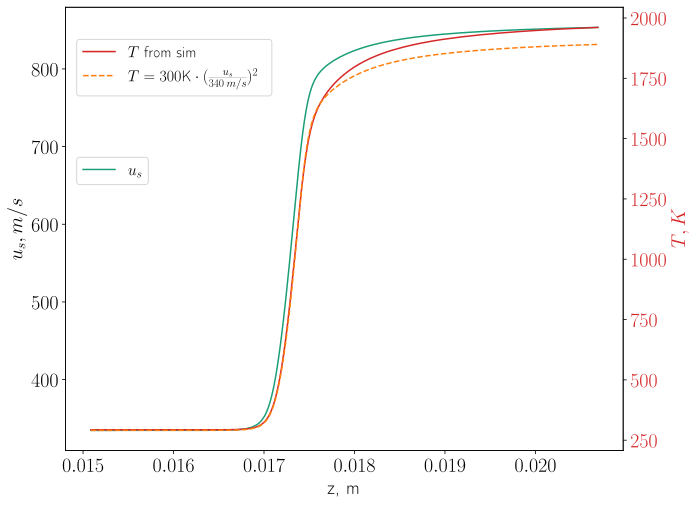

In [114]:
plt.rc('text', usetex=True)
plt.rc('text.latex',preamble=r' \usepackage[russian]{babel} \usepackage{amsmath}')
# plt.rc('text.latex',preamble=r'')
# plt.rc('text.latex',preamble=r'')
plt.rc('font', size=18)
# plt.rcParams['text.latex.preamble'] = r'\boldmath'/
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['legend.fontsize'] = 16
plt.rcParams['figure.dpi'] = 300
# plt.gca().spines[['right', 'top']].set_visible(False)
plt.rcParams['figure.figsize'] = [8, 7]

mask = (f.grid > 0.015) & (f.grid < 0.021)

# fig, ax = plt.subplots()
fig, ax2 = plt.subplots(figsize=(10, 8))

# fig.set_dpi(1000)

color = 'tab:red'
ax2.set_xlabel('z, m')
spns = ["o2", "c2h5oh",  "co2", "co", "h2o"]
ax1 = ax2.twinx()  # instantiate a second axes that shares the same x-axis

ax1.set_ylabel('$T, K$', color=color)
ax1.plot(f.grid[mask], f.T[mask], color=color, linestyle='solid', label="$T$ from sim")
# ax1.plot(t_D, tvec6[:, 0], color="tab:orange")
ax1.tick_params(axis='y', labelcolor=color)
ax2.set_prop_cycle('color',plt.cm.Dark2(list(range(len(spns)))))
color = 'black'
ax2.set_ylabel('$u_s, m/s$', color=color) 

ss = []
TTTT = [] 
sol = ct.Solution(file)
for i in range(len(f.grid[mask])):
    sol.TPY = f.T[mask][i], f.P, f.Y[:, mask][:, i]
    ss.append(sol.sound_speed)
    TTTT.append((sol.sound_speed / 340)**2 * 300)

ax1.plot(f.grid[mask], TTTT, color="tab:orange", linestyle='dashed', label="$T = 300 \\text{K} \cdot (\\frac{u_{s}}{340 \\: m/s})^2$")

ax2.plot(f.grid[mask], ss, label="$u_s$")
ax2.legend(loc=(0.02, 0.6))
ax1.legend(loc=(0.02, 0.8))
ax2.tick_params(axis='y', labelcolor=color)

fig.savefig("sound_speed.pdf", bbox_inches="tight")

In [146]:
Ts = np.linspace(293, 1500)
Y_rec = {'N2': 0.72865, 'O2': 0.22135, 'C2H5OH': 0.05}
Y_prd = {"N2" : 0.73, "O2": 0.12, "H2O": 0.06, "CO2":  0.09}
recs_ss = []
for T in Ts:
    sol.TPY = T, 1e5, Y_rec
    recs_ss.append(sol.sound_speed)
recs_ss = np.array(recs_ss)
prds_ss = []
for T in Ts:
    sol.TPY = T, 1e5, Y_prd
    prds_ss.append(sol.sound_speed)
prds_ss = np.array(prds_ss)
ss = 340 * (Ts/ 300)**0.5

In [152]:
np.max(np.abs(ss - recs_ss) / recs_ss)

np.float64(0.03650063818156423)

In [151]:
np.max(np.abs(ss - prds_ss) / prds_ss)

np.float64(0.02439408092707506)

<>:3: SyntaxWarning: invalid escape sequence '\c'
<>:3: SyntaxWarning: invalid escape sequence '\c'
/tmp/ipykernel_31627/564975676.py:3: SyntaxWarning: invalid escape sequence '\c'
  plt.plot(Ts, ss, label="$$u_s = 340 \\text{m/s} \cdot (T / 300 \\text{K})^{1/2}$$")


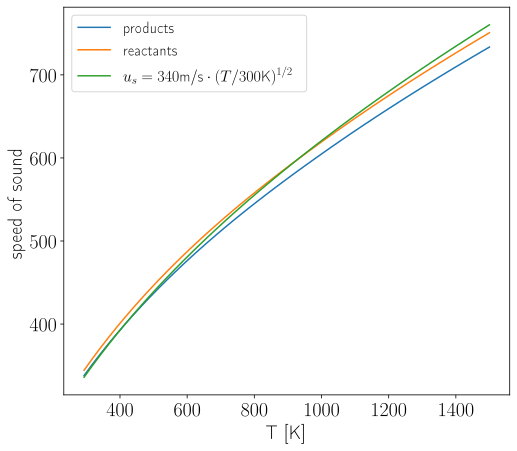

In [156]:
plt.plot(Ts, recs_ss, label="products")
plt.plot(Ts, prds_ss, label="reactants")
plt.plot(Ts, ss, label="$$u_s = 340 \\text{m/s} \cdot (T / 300 \\text{K})^{1/2}$$")
plt.xlabel("T [K]")
plt.ylabel("speed of sound")
plt.legend()
plt.savefig("sound_speed_prd_rcts.pdf", bbox_inches="tight")

In [111]:
(TTTT[-1] - f.T[mask][-1])/f.T[mask][-1]

np.float64(-0.0359568819975273)

In [163]:
sol.density  * 1 * 0.01/sol.viscosity

647.172725578331

In [164]:
sol()


  gas:

       temperature   293 K
          pressure   1e+05 Pa
           density   1.1843 kg/m^3
  mean mol. weight   28.851 kg/kmol
   phase of matter   gas

                          1 kg             1 kmol     
                     ---------------   ---------------
          enthalpy           -5160.3       -1.4888e+05  J
   internal energy            -89599        -2.585e+06  J
           entropy            6871.6        1.9825e+05  J/K
    Gibbs function       -2.0185e+06       -5.8237e+07  J
 heat capacity c_p            1009.3             29120  J/K
 heat capacity c_v            721.14             20806  J/K

                      mass frac. Y      mole frac. X     chem. pot. / RT
                     ---------------   ---------------   ---------------
                N2             0.767           0.78992           -23.283
                O2             0.233           0.21008           -26.248
     [  +32 minor]                 0                 0  



In [161]:
sol()


  gas:

       temperature   1500 K
          pressure   1e+05 Pa
           density   0.22789 kg/m^3
  mean mol. weight   28.422 kg/kmol
   phase of matter   gas

                          1 kg             1 kmol     
                     ---------------   ---------------
          enthalpy       -1.7034e+05       -4.8415e+06  J
   internal energy       -6.0915e+05       -1.7313e+07  J
           entropy            8953.4        2.5447e+05  J/K
    Gibbs function         -1.36e+07       -3.8655e+08  J
 heat capacity c_p            1321.1             37547  J/K
 heat capacity c_v            1028.5             29233  J/K

                      mass frac. Y      mole frac. X     chem. pot. / RT
                     ---------------   ---------------   ---------------
                N2              0.73           0.74063           -26.315
                O2              0.12           0.10659           -30.036
               H2O              0.06          0.094661           -48.043
     

<Axes: >

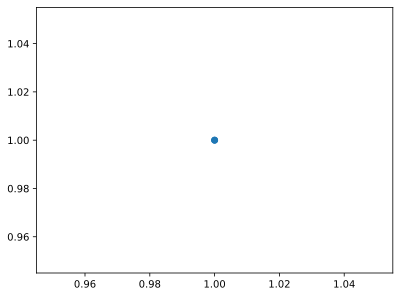

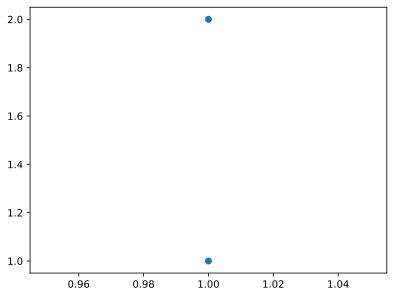

In [50]:

ax1.scatter([1, 1], [1, 1])
fig1.add_axes(ax1)


ax2.scatter([1, 1], [1, 2])
fig2.add_axes(ax2)

In [34]:
gas.sound_speed

327.7299697274758

In [3]:
import h5py

/tmp/ipykernel_492447/1167043514.py:31: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax1.scatter(np.array(f["solution"]["flame"]["grid"])[[-1]],  [gas.Y[gas.species_index(i)]], c=cs[j], marker="x")
/tmp/ipykernel_492447/1167043514.py:37: UserWarning: NasaPoly2::validate: 
For species CH2CH2OH, discontinuity in cp/R detected at Tmid = 1000
	Value computed using low-temperature polynomial:  15.107838949
	Value computed using high-temperature polynomial: 15.385775331099998

  gas = ct.Solution(file)
/tmp/ipykernel_492447/1167043514.py:37: UserWarning: NasaPoly2::validate: 
For species CH2CH2OH, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  4.688575616966668

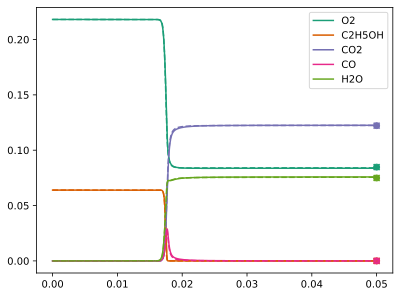

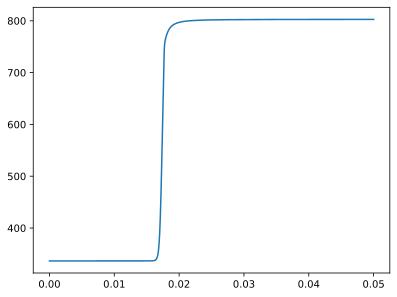

In [55]:
fig1 = plt.figure()
ax1 = plt.subplot()
fig2= plt.figure()
ax2 = plt.subplot()


spns = ["o2", "c2h5oh",  "co2", "co", "h2o"]
cs = plt.cm.Dark2(list(range(len(spns))))

N = 1

with h5py.File(f"flames/ethanol-marinov.yaml.{N}.res.hdf", "r") as f:
    file = 'mechanisms/marinov_ethanol/from_repo/ethanol-marinov.yaml'
    gas = ct.Solution(file)
    
    ss = []
    for i in range(len(f["solution"]["flame"]["grid"])):
        gas.TPY = f["solution"]["flame"]["T"][i], ct.one_atm, np.array(f["solution"]["flame"]["Y"])[i, :]
        ss.append(gas.sound_speed)

    ax2.plot(np.array(f["solution"]["flame"]["grid"]), ss)
    
    # plt.plot(np.array(f["solution"]["flame"]["grid"]), np.array(f["solution"]["flame"]["T"]))
    # plt.plot(np.array(f["solution"]["flame"]["grid"]), np.array(f["solution"]["flame"]["T"]))
    # print(f["solution"]["flame"]["Y"][gas.specie_index()])
    gas.TPY = f["solution"]["flame"]["T"][0], ct.one_atm, np.array(f["solution"]["flame"]["Y"])[0, :]
    gas.equilibrate("HP")
    for j, i in enumerate(spns):
        i_ = str(i).upper()
        ax1.plot(np.array(f["solution"]["flame"]["grid"]),  np.array(f["solution"]["flame"]["Y"])[:, gas.species_index(i)], label=i_, c=cs[j])
        ax1.scatter(np.array(f["solution"]["flame"]["grid"])[[-1]],  [gas.Y[gas.species_index(i)]], c=cs[j], marker="x")

        

with h5py.File(f"flames/ethanol66.yaml.{N}.res.hdf", "r") as f:
    file = 'mechanisms/deepflame_ethanol_gri_reduced/ethanol66.yaml'
    gas = ct.Solution(file)

    # plt.plot(np.array(f["solution"]["flame"]["grid"]), np.array(f["solution"]["flame"]["T"]))
    gas.TPY = f["solution"]["flame"]["T"][0], ct.one_atm, np.array(f["solution"]["flame"]["Y"])[0, :]
    gas.equilibrate("HP")
    for j, i in enumerate(spns):
        i = str(i).upper()
        ax1.plot(np.array(f["solution"]["flame"]["grid"]),  np.array(f["solution"]["flame"]["Y"])[:, gas.species_index(i)], c=cs[j], linestyle="--")
        ax1.scatter(np.array(f["solution"]["flame"]["grid"])[[-1]],  [gas.Y[gas.species_index(i)]], c=cs[j], marker="o")

        
ax1.legend()

In [19]:

# spns = ["o2", "c2h5oh",  "co2", "co", "h2o"]
# cs = plt.cm.Dark2(list(range(len(spns))))
vels = []
ys = []

file = 'mechanisms/marinov_ethanol/from_repo/ethanol-marinov.yaml'
gas = ct.Solution(file)
for i in range(10):
    with h5py.File(f"flames/ethanol-marinov.yaml.{i}.res.hdf", "r") as f:
        file = 'mechanisms/marinov_ethanol/from_repo/ethanol-marinov.yaml'
        vels.append(f["solution"]["flame"]["velocity"][0])
        ys.append(f["solution"]["flame"]["Y"][0][gas.species_index(i)])

plt.plot(phi_list, vels, label="marinov")

vels = []
ys = []

file = 'mechanisms/deepflame_ethnaol_gri_reduced/ethanol66.yaml'
gas = ct.Solution(file)
for i in range(10):
    with h5py.File(f"flames/ethanol66.yaml.{i}.res.hdf", "r") as f:
        file = 'mechanisms/deepflame_ethnaol_gri_reduced/ethanol66.yaml'
        vels.append(f["solution"]["flame"]["velocity"][0])
        ys.append(f["solution"]["flame"]["Y"][0][gas.species_index(i)])

plt.plot(phi_list, vels, label="66")

plt.legend()

NameError: name 'phi_list' is not defined

In [ ]:

with h5py.File("ethanol-marinov.yaml.res.hdf", "r") as f:
    plt.plot(np.array(f["solution"]["flame"]["grid"]), np.array(f["solution"]["flame"]["T"]))


with h5py.File("ethanol66.yaml.res.hdf", "r") as f:
    plt.plot(np.array(f["solution"]["flame"]["grid"]), np.array(f["solution"]["flame"]["T"]))

In [79]:
f =  h5py.File("ethanol66.yaml.res.hdf", "r")

In [59]:
f["solution"]["flame"]["Y"][""]

<HDF5 dataset "Y": shape (219, 34), type "<f8">

In [81]:
f["solution"]["flame"]["velocity"][0]

np.float64(0.1674059939504277)

In [76]:
f["solution"]["flame"].keys()

<KeysViewHDF5 ['D', 'T', 'Y', 'fixed-point', 'grid', 'phase', 'refine-criteria', 'tolerances', 'velocity']>

In [83]:
ys

[np.float64(0.7263878817539252),
 np.float64(-2.0827420616298623e-59),
 np.float64(1.351826302554079e-61),
 np.float64(3.3359273869902614e-16),
 np.float64(0.21074352871183621),
 np.float64(1.2586055828837072e-15),
 np.float64(1.3440925350908946e-16),
 np.float64(-1.2125074963976644e-15),
 np.float64(-1.4977232382928526e-15),
 np.float64(-1.0152529644736755e-15)]